In [8]:
import numpy as np
import matplotlib.pyplot as plt

def dataset_overview(filepath, dtype_arr):
    data = np.genfromtxt(filepath, delimiter = ',', dtype = dtype_arr, names = True)

    num_rows = data.shape[0]
    num_cols = len(data[0])

    print(f"There are {num_rows} rows and {num_cols} columns in the dataset\n")

    print("The names of the columns are:")
    for i, col in enumerate(data.dtype.names):
        is_numeric = True
        has_zero = False

        for row in data:
            if not str(row[i]).isnumeric():
                is_numeric = False

            if is_numeric and row[i] == 0:
                has_zero = True

        print(f"- {col}, {type(col)}, isnumeric: {is_numeric}, contains zero: {has_zero}")

    print()

    for i, col in enumerate(data.dtype.names):
        col_list = []
        for row in data:
            col_list.append(row[i])
        col_set = set(col_list)
        unique_col = (list(col_set))

        print(f"There are {len(unique_col)} unique values in the {col} column")

    print("\nThis is an example of one row:\n")
    for i, col in enumerate(data.dtype.names):
        print(f"{col}: {data[0][i]}")

    return data

There are 216 rows and 3 columns in the dataset

The names of the columns are:
- year, <class 'str'>, isnumeric: True, contains zero: False
- type_of_educational_institutions, <class 'str'>, isnumeric: False, contains zero: False
- development_expenditure, <class 'str'>, isnumeric: True, contains zero: True

There are 36 unique values in the year column
There are 6 unique values in the type_of_educational_institutions column
There are 212 unique values in the development_expenditure column

This is an example of one row:

year: 1985
type_of_educational_institutions: Institute of Technical Education
development_expenditure: 25969


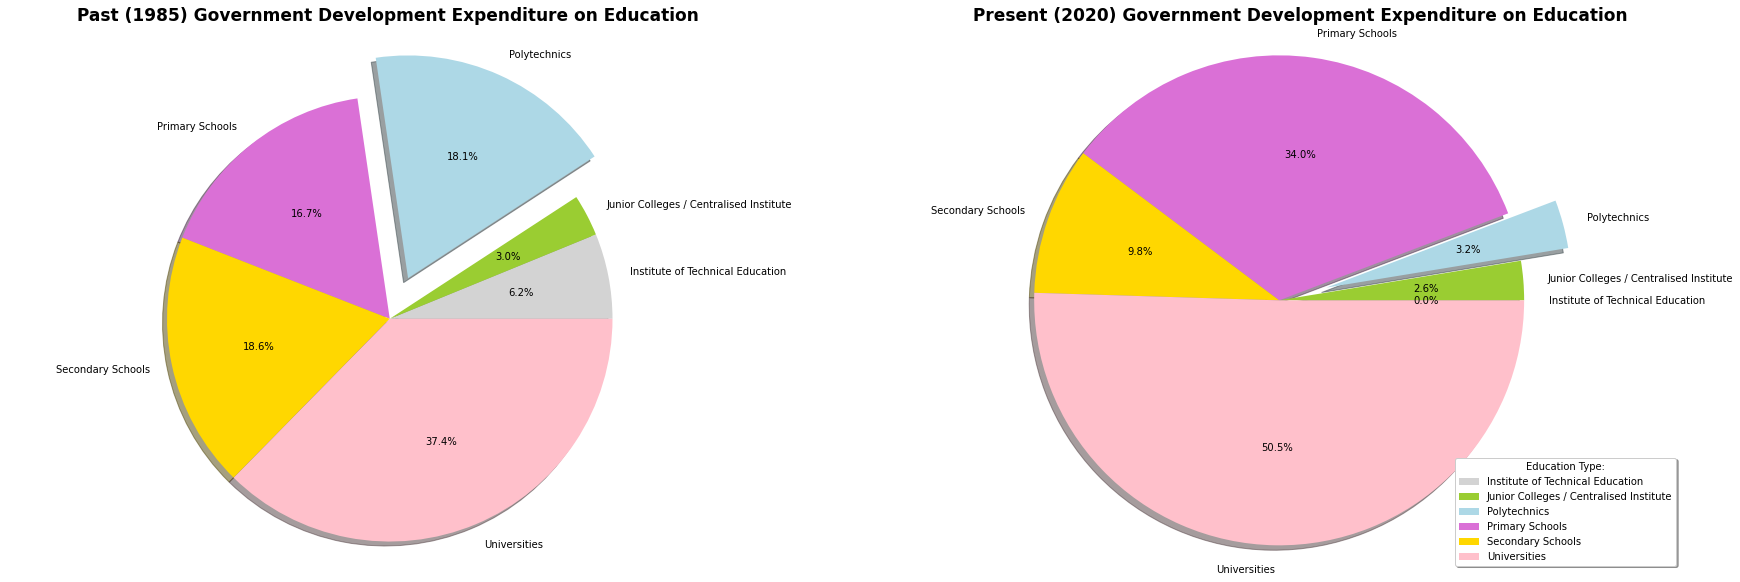

In [9]:
# dataset 1: Total government development expenditure on education (pie chart)
filepath = "government-development-expenditure-on-education.csv"
dtype_arr = [('year','i4'),('type_of_educational_institutions','U50'),('development_expenditure','i4')]
govtExp = dataset_overview(filepath, dtype_arr)

# comparing PAST vs PRESENT govt development expenditure 

import numpy as np
import matplotlib.pyplot as plt

# import data
filename = "government-development-expenditure-on-education.csv"
data = np.genfromtxt(filename,dtype=['i4','U50','i8'],delimiter=',',names=True)

# get labels
eduTypes = data['type_of_educational_institutions']
eduTypes = np.unique(eduTypes)

# get 1985 data (past)
pastData = data[np.where(data['year'] == 1985)]
# get 2020 data (present)
presentData = data[np.where(data['year'] == 2020)]

# get value
pastExp = pastData['development_expenditure']
presentExp = presentData['development_expenditure']

fig = plt.figure(1,figsize=(30,10))
fig.set_facecolor("white")

explode = [0,0,0.2,0,0,0]
colors = ['lightgrey','yellowgreen','lightblue','orchid','#FFD700','#FFC0CB']

plt.subplot(121)
plt.pie(pastExp,labels=eduTypes,autopct='%1.1f%%',explode=explode,shadow=True,colors=colors)
plt.axis('equal')
plt.title("Past (1985) Government Development Expenditure on Education",weight='bold',fontsize=17)

plt.subplot(122)
plt.pie(presentExp,labels=eduTypes,autopct='%1.1f%%',explode=explode,shadow=True,colors=colors)
plt.axis('equal')
plt.legend(loc="lower right",shadow=True,title="Education Type:")
plt.title("Present (2020) Government Development Expenditure on Education",weight='bold',fontsize=17)

plt.show()

There are 48 rows and 4 columns in the dataset

The names of the columns are:
- year, <class 'str'>, isnumeric: True, contains zero: False
- age_group, <class 'str'>, isnumeric: False, contains zero: False
- gender, <class 'str'>, isnumeric: False, contains zero: False
- per_10000_examined, <class 'str'>, isnumeric: True, contains zero: False

There are 12 unique values in the year column
There are 2 unique values in the age_group column
There are 2 unique values in the gender column
There are 48 unique values in the per_10000_examined column

This is an example of one row:

year: 2009
age_group: Primary 1 and equivalent age groups
gender: Male
per_10000_examined: 1212


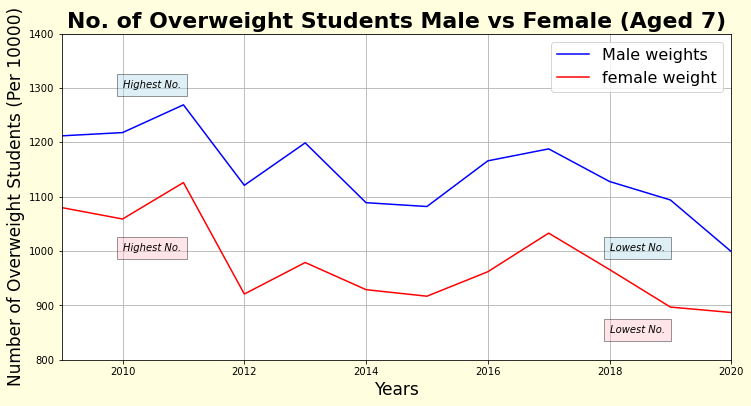

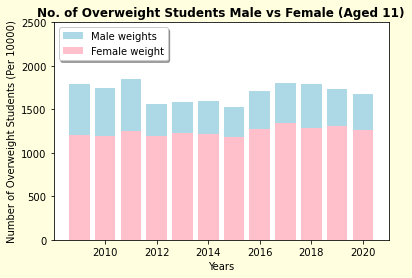

In [10]:
# dataset 2: Number of Overweight Students in different age groups (line chart & bar chart)

filepath = "common-health-problems-of-students-examined-overweight-annual.csv"
dtype_arr = [('year','i4'),('age_group','U50'),('gender','U50'),('per_10000_examined','i4')]
overweightData = dataset_overview(filepath, dtype_arr)

# how has population of overweight students change over the years? [Male vs Female]
filename = "common-health-problems-of-students-examined-overweight-annual.csv"
data = np.genfromtxt(filename,dtype=['i4','U50','U50','i4'],delimiter=',',names=True)

# 1. Primary 1 and equivalent age groups (line chart)
years = data['year']
years = np.unique(years)

# male 
maleData = data[data['gender'] == 'Male']
maleDataPriOne = maleData[maleData['age_group'] == 'Primary 1 and equivalent age groups']
weightsMale1 = maleDataPriOne['per_10000_examined']

# female 
femaleData = data[data['gender'] == 'Female']
girlsDataPriOne = femaleData[femaleData['age_group'] == 'Primary 1 and equivalent age groups']
weightsGirls1 = girlsDataPriOne['per_10000_examined']

fig = plt.figure(1,figsize=(12,6))
fig.set_facecolor("lightyellow")

plt.plot(years, weightsMale1, label="Male weights",color="blue")
plt.plot(years, weightsGirls1, label="female weight", color="red")
plt.axis([2009,2020,800,1400])

# male annotations
plt.text(2010,1300,'Highest No.', style='italic',bbox={'facecolor':'lightblue', 'alpha': 0.4, 'pad':6})
plt.text(2018,1000,'Lowest No.', style='italic',bbox={'facecolor':'lightblue', 'alpha': 0.4, 'pad':6})
# female annotations
plt.text(2010,1000,'Highest No.', style='italic',bbox={'facecolor':'pink', 'alpha': 0.4, 'pad':6})
plt.text(2018,850,'Lowest No.', style='italic',bbox={'facecolor':'pink', 'alpha': 0.4, 'pad':6})

# graph labels
plt.xlabel("Years",fontsize=17)
plt.ylabel("Number of Overweight Students (Per 10000)",fontsize=17)
plt.title("No. of Overweight Students Male vs Female (Aged 7)",weight="bold",fontsize=22)
plt.legend(fontsize=16)
plt.grid()
plt.show()

# 2. Primary 5 and equivalent age groups (bar chart)
years = data['year']
years = np.unique(years)

# male 
maleData = data[data['gender'] == 'Male']
maleDataPriFive = maleData[maleData['age_group'] == 'Primary 5 and equivalent age groups']
weightsMale = maleDataPriFive['per_10000_examined']

# female 
femaleData = data[data['gender'] == 'Female']
girlsDataPriFive = femaleData[femaleData['age_group'] == 'Primary 5 and equivalent age groups']
weightsGirls = girlsDataPriFive['per_10000_examined']

fig,ax = plt.subplots()
fig.set_facecolor("lightyellow")

ax.bar(years,weightsMale, label="Male weights",color="lightblue")
ax.bar(years,weightsGirls, label="Female weight", color="pink")

ax.legend(loc='upper left',shadow=True)

plt.ylim(0,2500)
plt.xlabel("Years")
plt.ylabel("Number of Overweight Students (Per 10000)")
plt.title("No. of Overweight Students Male vs Female (Aged 11)",fontweight='bold')

plt.show()


There are 128 rows and 3 columns in the dataset

The names of the columns are:
- year, <class 'str'>, isnumeric: True, contains zero: False
- diploma_course, <class 'str'>, isnumeric: False, contains zero: False
- enrolment, <class 'str'>, isnumeric: True, contains zero: False

There are 16 unique values in the year column
There are 4 unique values in the diploma_course column
There are 121 unique values in the enrolment column

This is an example of one row:

year: 2005
diploma_course: Business & Administration
enrolment: 322


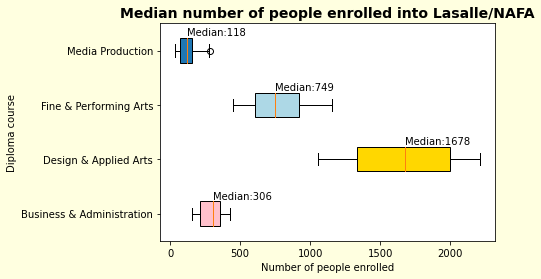

In [11]:
# dataset 3: laselle and nafa (boxplot)

filepath = "lasalle-and-nafa-intake-enrolment-and-graduates-by-diploma.csv"
dtype_arr = [('year','i4'),('diploma_course','U50'),('enrolment','i4')]
art = dataset_overview(filepath, dtype_arr)

# enrolment
filename = "lasalle-and-nafa-intake-enrolment-and-graduates-by-diploma.csv"
data = np.genfromtxt(filename,dtype=['i4','U50','i4'],delimiter=',',names=True)

labels = ['Business & Administration','Design & Applied Arts','Fine & Performing Arts','Media Production']

business = data[np.isin(data['diploma_course'],['Business & Administration'])]
design = data[np.isin(data['diploma_course'],['Design & Applied Arts'])]
perform = data[np.isin(data['diploma_course'],['Fine & Performing Arts'])]
media = data[np.isin(data['diploma_course'],['Media Production'])]

businessEn = business['enrolment']
designEn = design['enrolment']
performEn = perform['enrolment']
mediaEn = media['enrolment']

enrolment = [businessEn,designEn,performEn,mediaEn]

fig = plt.figure(facecolor="lightyellow")
bplot = plt.boxplot(enrolment,labels=labels,vert=False,patch_artist=True)

# median 
for line in bplot['medians']:
    x,y = line.get_xydata()[1]
    #overlay median value based on position value x,y
    plt.text(x, y+0.05, f'Median:{x:.0f}')
    
# boxplot and background colors
bplot['boxes'][0].set_facecolor('pink')
bplot['boxes'][1].set_facecolor('gold')
bplot['boxes'][2].set_facecolor('lightblue')

plt.xlabel("Number of people enrolled")
plt.ylabel("Diploma course")
plt.title("Median number of people enrolled into Lasalle/NAFA",fontweight="bold",fontsize=14)
plt.show()


There are 120 rows and 3 columns in the dataset

The names of the columns are:
- year, <class 'str'>, isnumeric: True, contains zero: False
- race, <class 'str'>, isnumeric: False, contains zero: False
- percentage_pass_mtl, <class 'str'>, isnumeric: True, contains zero: False

There are 24 unique values in the year column
There are 5 unique values in the race column
There are 22 unique values in the percentage_pass_mtl column

This is an example of one row:

year: 1997
race: Malay
percentage_pass_mtl: 99


C:\Users\65874\AppData\Local\Temp\ipykernel_15972\3856727382.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, m*x + b, 'r-', color="green")


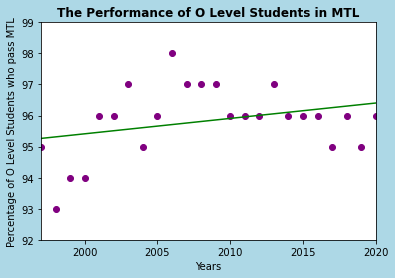

In [12]:
# dataset 4: percentage of gce o level students who passed mtl (scatterplot)

filepath = "percentage-of-gce-o-level-students-who-passed-mtl.csv"
dtype_arr = [('year','i4'),('race','U50'),('percentage_pass_mtl','i4')]
mtl = dataset_overview(filepath, dtype_arr)

# find out the percentage of O Level students who pass MTL over the years
filename = "percentage-of-gce-o-level-students-who-passed-mtl.csv"
data = np.genfromtxt(filename,dtype=['i4','U50','i4'],delimiter=',',names=True)

# x & y 
years = data['year']
x = np.unique(years)

overall = data[np.isin(data["race"],["Overall"])]
y = overall['percentage_pass_mtl']

fig,ax = plt.subplots()
fig.set_facecolor("lightblue")

# graph labels 
plt.xlabel("Years")
plt.ylabel("Percentage of O Level Students who pass MTL")
plt.title("The Performance of O Level Students in MTL",fontweight="bold")
plt.axis([1997,2020,92,99])

# add best fit line
m,b = np.polyfit(x, y, deg=1)
plt.plot(x, m*x + b, 'r-', color="green")

plt.scatter(x,y,color="purple")

plt.show()